# 1. 환경설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns



In [2]:
# 지수표현 없애기
pd.options.display.float_format = '{:.2f}'.format

# 2. 데이터 불러오기 및 전처리


## 2-1. 노출 관련 테이블

In [3]:
processed_school_path = 'dumps/processed/processed_accounts_school.csv'
processed_user_contacts_path = 'dumps/processed/processed_accounts_user_contacts.csv'
processed_school = pd.read_csv(processed_school_path)
processed_user_contacts = pd.read_csv(processed_user_contacts_path)

In [4]:
processed_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5951 entries, 0 to 5950
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5951 non-null   int64 
 1   address           5951 non-null   object
 2   student_count     5951 non-null   int64 
 3   school_type       5951 non-null   object
 4   address_clean     5948 non-null   object
 5   is_active_school  5951 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 238.4+ KB


In [5]:
# 전처리
processed_school['id'] = processed_school['id'].astype(str) # id 고유값 문자형 변환
processed_school.rename(columns={'id': 'school_id'}, inplace=True) # id 컬럼 이름 변경

In [6]:
processed_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5951 entries, 0 to 5950
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   school_id         5951 non-null   object
 1   address           5951 non-null   object
 2   student_count     5951 non-null   int64 
 3   school_type       5951 non-null   object
 4   address_clean     5948 non-null   object
 5   is_active_school  5951 non-null   bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 238.4+ KB


In [7]:
processed_school.head()

,school_id,address,student_count,school_type,address_clean,is_active_school
0,4,충청북도 충주시,239,H,충청북도 충주시,True
1,5,충청북도 충주시,160,M,충청북도 충주시,True
2,6,충청북도 충주시,200,H,충청북도 충주시,True
3,7,충청북도 충주시,114,H,충청북도 충주시,True
4,8,충청북도 충주시,139,M,충청북도 충주시,True


In [8]:
processed_user_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   5063 non-null   int64 
 1   user_id              5063 non-null   int64 
 2   contacts_count       5063 non-null   int64 
 3   invite_user_id_list  1158 non-null   object
 4   invite_cnt           5063 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 197.9+ KB


In [9]:
# 전처리
import ast
def convert_to_list(x):
    try:
        if pd.isna(x) or x == "": return []
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

processed_user_contacts['invite_user_id_list'] = processed_user_contacts['invite_user_id_list'].apply(convert_to_list) # 리스트인척 하는 문자열을 진짜 리스트로 변환
processed_user_contacts['user_id'] = processed_user_contacts['user_id'].astype(str) # id 문자열 형변환
processed_user_contacts.drop(columns='id', inplace=True) # 불필요한 컬럼 제거
processed_user_contacts.rename(columns={'invite_cnt': 'invite_count'}, inplace=True) # 컬럼 이름 변경

## 2-2. 유입 관련 테이블

In [10]:
processed_user_path = 'dumps/processed/processed_accounts_user.csv'
processed_user = pd.read_csv(processed_user_path)

In [11]:
processed_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676978 entries, 0 to 676977
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             676978 non-null  int64  
 1   gender              676978 non-null  object 
 2   point               676978 non-null  int64  
 3   friend_id_list      674111 non-null  object 
 4   is_push_on          676978 non-null  int64  
 5   created_at          676978 non-null  object 
 6   block_user_id_list  676978 non-null  object 
 7   hide_user_id_list   676978 non-null  object 
 8   ban_status          676978 non-null  object 
 9   report_count        676978 non-null  int64  
 10  alarm_count         676978 non-null  int64  
 11  pending_chat        676978 non-null  int64  
 12  pending_votes       676978 non-null  int64  
 13  group_id            676978 non-null  float64
 14  friend_count        676978 non-null  int64  
dtypes: float64(1), int64(8), object(6)

In [12]:
# 전처리
processed_user['created_at'] = pd.to_datetime(processed_user['created_at']).dt.floor('s')
processed_user['user_id'] = processed_user['user_id'].astype(str)

In [13]:
# 기간 설정
timeframe_user_condition = processed_user['created_at'].between('2023-05-13', '2024-05-07')
processed_user = processed_user[timeframe_user_condition]

In [14]:
processed_user.describe()

,point,is_push_on,created_at,report_count,alarm_count,pending_chat,pending_votes,group_id,friend_count
count,363134.00,363134.00,363134,363134.00,363134.00,363134.00,363134.00,363134.00,363134.00
mean,1614.57,0.84,2023-05-23 01:52:50.418644224,0.03,0.88,0.08,66.43,49871.02,48.09
min,0.00,0.00,2023-05-13 00:00:02,0.00,0.00,-1.00,0.00,1.00,0.00
25%,383.00,1.00,2023-05-15 17:40:44.249999872,0.00,1.00,0.00,1.00,37477.50,27.00
50%,912.00,1.00,2023-05-19 19:46:40.500000,0.00,1.00,0.00,17.00,53135.50,43.00
75%,2096.00,1.00,2023-05-24 13:39:24.249999872,0.00,1.00,0.00,89.00,64868.00,64.00
max,206081.00,1.00,2024-05-06 22:48:40,57.00,238.00,256.00,2744.00,84544.00,1373.00
std,2170.49,0.36,NaN,0.33,0.95,0.64,106.41,19886.98,30.90


## 2-3. 참여 관련 테이블

In [15]:
processed_questionset_path = 'dumps/processed/processed_polls_questionset.csv'
processed_questionset = pd.read_csv(processed_questionset_path)

In [16]:
processed_questionset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157705 entries, 0 to 157704
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      157705 non-null  int64 
 1   question_piece_id_list  157705 non-null  object
 2   opening_time            157705 non-null  object
 3   status                  157705 non-null  object
 4   created_at              157705 non-null  object
 5   user_id                 157705 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 7.2+ MB


In [17]:
# 기본 전처리
processed_questionset['question_piece_id_list'] = processed_questionset['question_piece_id_list'].apply(convert_to_list)
processed_questionset['created_at'] = pd.to_datetime(processed_questionset['created_at']).dt.floor('s')
processed_questionset['user_id'] = processed_questionset['user_id'].astype(str)
processed_questionset.drop(columns='id', inplace=True) # 불필요한 컬럼 제거

In [18]:
# 기간 설정
timeframe_questionset_condition = processed_questionset['created_at'].between('2023-05-13', '2024-05-07')
processed_questionset = processed_questionset[timeframe_questionset_condition]

In [19]:
processed_questionset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102120 entries, 55582 to 157701
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   question_piece_id_list  102120 non-null  object        
 1   opening_time            102120 non-null  object        
 2   status                  102120 non-null  object        
 3   created_at              102120 non-null  datetime64[ns]
 4   user_id                 102120 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 4.7+ MB


In [20]:
processed_questionset.head()

,question_piece_id_list,opening_time,status,created_at,user_id
55582,"[42518434, 42518438, 42518442, 42518445, 42518...",2023-05-13 00:40:04,F,2023-05-13 00:00:04,1020222
55583,"[42518608, 42518609, 42518610, 42518612, 42518...",2023-05-13 00:40:07,F,2023-05-13 00:00:07,1159808
55584,"[42519448, 42519449, 42519450, 42519451, 42519...",2023-05-13 00:40:15,F,2023-05-13 00:00:15,1150297
55585,"[42520038, 42520040, 42520041, 42520044, 42520...",2023-05-13 00:40:24,F,2023-05-13 00:00:24,887740
55586,"[42521438, 42521440, 42521443, 42521445, 42521...",2023-05-13 00:40:40,F,2023-05-13 00:00:40,1159159


## 2-4. 수익관련 테이블

In [21]:
processed_payment_path = 'dumps/processed/processed_accounts_paymenthistory.csv'
processed_payment = pd.read_csv(processed_payment_path)
processed_failpayment_path = 'dumps/processed/processed_accounts_failpaymenthistory.csv'
processed_failpayment = pd.read_csv(processed_failpayment_path)

In [22]:
processed_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95140 entries, 0 to 95139
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     95140 non-null  int64 
 1   productId   95140 non-null  object
 2   phone_type  95140 non-null  object
 3   created_at  95140 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [23]:
processed_failpayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          160 non-null    int64 
 1   user_id     160 non-null    int64 
 2   productId   56 non-null     object
 3   phone_type  160 non-null    object
 4   created_at  160 non-null    object
dtypes: int64(2), object(3)
memory usage: 6.4+ KB


In [24]:
# 기본 전처리
processed_payment['created_at'] = pd.to_datetime(processed_payment['created_at']).dt.floor('s')
processed_payment['user_id'] = processed_payment['user_id'].astype(str)
# 상품명 하트수(숫자)로 변환
product_map = {
    'heart.777': 777,
    'heart.200': 200,
    'heart.4000': 4000,
    'heart.1000': 1000
}
processed_payment['productId'] = processed_payment['productId'].map(product_map)

processed_failpayment['created_at'] = pd.to_datetime(processed_failpayment['created_at']).dt.floor('s')
processed_failpayment['user_id'] = processed_failpayment['user_id'].astype(str)
processed_failpayment = processed_failpayment.drop(columns='id')

In [25]:
# 기간 설정
timeframe_payment_condition = processed_payment['created_at'].between('2023-05-13', '2024-05-07')
processed_payment = processed_payment[timeframe_payment_condition]

In [26]:
processed_payment.info()
print('=' * 10)
processed_failpayment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95136 entries, 0 to 95135
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     95136 non-null  object        
 1   productId   95136 non-null  int64         
 2   phone_type  95136 non-null  object        
 3   created_at  95136 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     160 non-null    object        
 1   productId   56 non-null     object        
 2   phone_type  160 non-null    object        
 3   created_at  160 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 5.1+ KB


# 3. 데이터 파악

## 3-1. 퍼널 전환율

### 3-1-1. 노출

In [28]:
processed_user_contacts.head()

,user_id,contacts_count,invite_user_id_list,invite_count
0,1167696,30,[],0
1,863169,79,[],0
2,857205,21,[854615],1
3,851431,29,[],0
4,855476,28,[849318],1


In [45]:
processed_user_contacts.describe()

,contacts_count,invite_count
count,5063.00,5063.00
mean,25.99,0.33
std,13.60,0.75
min,0.00,0.00
25%,16.00,0.00
50%,24.00,0.00
75%,34.00,0.00
max,114.00,10.00


In [ ]:
# 유저당 초대받았던 기록의 합계
processed_user_contacts['invite_count'].sum()

np.int64(1687)

In [33]:
# 이 유저의 연락처를 가지고있는 사람들 중 실제로 초대를 받은 비율
invite_ratio = processed_user_contacts['invite_count'] / processed_user_contacts['contacts_count'] * 100
invite_ratio.describe()

count   5060.00
mean       1.21
std        3.06
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      100.00
dtype: float64

In [ ]:
# 100%가 어케나와요
processed_user_contacts.iloc[invite_ratio.idxmax()]

user_id                  945228
contacts_count                1
invite_user_id_list    [887254]
invite_count                  1
Name: 2753, dtype: object

In [ ]:
invite_ratio.value_counts()
# 전체 5059명 중 연락처 대비 초대수가 없거나, 초대를 받지 않은 유저는 3902명

0.00     3902
4.35       42
4.76       42
3.85       36
5.56       32
         ... 
10.20       1
24.32       1
8.11        1
6.12        1
6.17        1
Name: count, Length: 143, dtype: int64

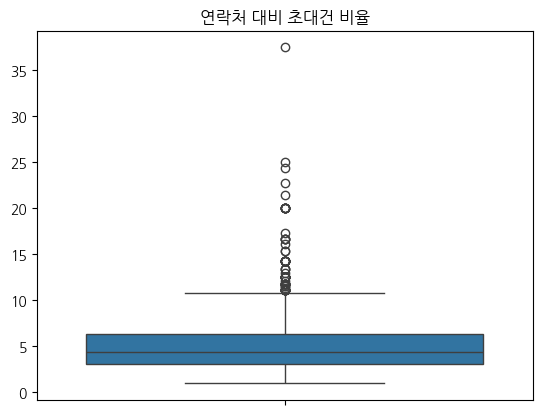

In [47]:
# 50% 이상: 이상치,0%: 결측치로 정의, 제외하고 그래프 확인
invite_condition = (invite_ratio > 0) & (invite_ratio <= 50)
plt.figure()
sns.boxplot(
    data=invite_ratio[invite_condition]
)
plt.title('연락처 대비 초대건 비율')
plt.show()

In [55]:
# 연락처 대비 초대건 비율의 평균을 5%로 계산
print(f"한 사람당 가지고 있는 연락처의 평균 중 초대하는 사람 수: {(processed_user_contacts['contacts_count'].mean()) * 0.05:.2f}")
print(f"유저의 전체 연락처 중 초대 가능성이 있는 수: {(processed_user_contacts['contacts_count'].sum()) * 0.05 * ((5059 - 3902) / 5059):.2f}")
# 한 사람 당 평균 1.3명 초대한다고 볼 수 있음
# 약간 1+1 느낌이네

한 사람당 가지고 있는 연락처의 평균 중 초대하는 사람 수: 1.30
유저의 전체 연락처 중 초대 가능성이 있는 수: 1504.49


### 3-1-2. 유입

In [56]:
processed_user.head()

,user_id,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id,friend_count
13299,855179,M,1358,"[849767, 850569, 857770, 856249, 850108, 869470]",1,2023-05-19 01:36:23,[],[],N,0,1,0,23,5532.00,6
22321,866522,F,2429,"[863744, 880135, 857608, 865290, 860687, 86376...",1,2023-05-19 01:32:15,[],[],N,0,1,0,17,7389.00,96
66005,916697,M,441,"[890753, 921090, 936709, 1035016, 1081352, 972...",1,2023-05-19 01:11:30,[1165931],[],N,0,1,0,1,18094.00,52
69363,920278,F,991,"[1452418, 935043, 982406, 1106183, 948743, 935...",0,2023-05-19 01:09:58,[],[],N,0,1,0,1,16478.00,35
70713,921725,F,839,"[900514, 924484, 992548, 934887, 946027, 92718...",0,2023-05-19 01:09:18,[],[],N,0,1,0,0,683.00,21


In [57]:
processed_user['user_id'].nunique()

363134

### 3-1-3. 참여

In [58]:
processed_questionset.head()

,question_piece_id_list,opening_time,status,created_at,user_id
55582,"[42518434, 42518438, 42518442, 42518445, 42518...",2023-05-13 00:40:04,F,2023-05-13 00:00:04,1020222
55583,"[42518608, 42518609, 42518610, 42518612, 42518...",2023-05-13 00:40:07,F,2023-05-13 00:00:07,1159808
55584,"[42519448, 42519449, 42519450, 42519451, 42519...",2023-05-13 00:40:15,F,2023-05-13 00:00:15,1150297
55585,"[42520038, 42520040, 42520041, 42520044, 42520...",2023-05-13 00:40:24,F,2023-05-13 00:00:24,887740
55586,"[42521438, 42521440, 42521443, 42521445, 42521...",2023-05-13 00:40:40,F,2023-05-13 00:00:40,1159159


In [63]:
processed_questionset.describe()

,created_at
count,102120
mean,2023-05-23 04:13:38.692841472
min,2023-05-13 00:00:04
25%,2023-05-15 22:50:27
50%,2023-05-20 05:31:53.500000
75%,2023-05-26 10:46:48.500000
max,2024-05-06 10:58:20


In [ ]:
# 유입(user table)의 유저 고유값 필터링
acquisition_user_list = processed_user['user_id'].unique()
processed_questionset = processed_questionset[processed_questionset['user_id'].isin(acquisition_user_list)]

- 와씨 유입 테이블 유저 고유값 필터링했더니 4291 -> 1886 으로 줄었음ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋ 뭐야???
    - 탈퇴한 유저의 기록이 user 테이블에서는 탈락됐는데 투표 테이블에는 남아있는건가?
- 4천명도 유입 user_id 대비 전환율 1%라서 아래 투표테이블을 추가해서 보기 시작한건데 .. 0.5%로 줄었음 ..
- 이전에 두언멘토님이.. 마케팅팀이랑 협업할때 그들이 원하는 내용이 있었는데
    - ds가 할 수 있는건 아니라고, 데이터 분석가랑 해야된다고 해서 이케이케 했다가
    - 데이터분석팀에서 전환율을 0.3% 증가시켜서 인센받고 난리났었다는 얘기를 해주신 적이 있음..
    - 0.1%만 올려도 효과적인 내용이라고 했었는데 ..
    - 그럼 지금 이 1%가 일반적인 수치인건가.?

In [87]:
# 질문 세트를 완료(Finish) 또는 오픈(Open) 한 유저아이디의 고유값
questionset_condition = (processed_questionset['status'] == 'F') | (processed_questionset['status'] == 'O')
processed_questionset[questionset_condition]['user_id'].nunique()

1886

- 답도없는 전환율(1% 대)
- user 테이블에 정말 중복값이 없는건가? device_id, group_id로 한번 더 확인해야될까?

#### 투표테이블 추가

In [77]:
userquestionrecord_path = 'dumps/raw_vote_csv/accounts_userquestionrecord.csv'
raw_userquestion_record = pd.read_csv(userquestionrecord_path)

In [78]:
raw_userquestion_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217558 entries, 0 to 1217557
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   id                 1217558 non-null  int64 
 1   status             1217558 non-null  object
 2   created_at         1217558 non-null  object
 3   chosen_user_id     1217558 non-null  int64 
 4   question_id        1217558 non-null  int64 
 5   user_id            1217558 non-null  int64 
 6   question_piece_id  1217558 non-null  int64 
 7   has_read           1217558 non-null  int64 
 8   answer_status      1217558 non-null  object
 9   answer_updated_at  1217558 non-null  object
 10  report_count       1217558 non-null  int64 
 11  opened_times       1217558 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 111.5+ MB


In [79]:
raw_userquestion_record.head()

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0


In [ ]:
# 전처리
processed_userquestion = raw_userquestion_record.copy()
processed_userquestion['created_at'] = pd.to_datetime(processed_userquestion['created_at']).dt.floor('s')
processed_userquestion['chosen_user_id'] = processed_userquestion['chosen_user_id'].astype(str)
processed_userquestion['question_id'] = processed_userquestion['question_id'].astype(str)
processed_userquestion['user_id'] = processed_userquestion['user_id'].astype(str)
processed_userquestion['question_piece_id'] = processed_userquestion['question_piece_id'].astype(str)
processed_userquestion.drop(columns='id', inplace=True) # 불필요한 컬럼 제거

# 기간 설정
userquestion_condition = processed_userquestion['created_at'].between('2023-05-13', '2024-05-07')
processed_userquestion = processed_userquestion[userquestion_condition]

In [ ]:
# 유입(user table)의 유저 고유값 필터링
processed_userquestion = processed_userquestion[processed_userquestion['user_id'].isin(acquisition_user_list)]

In [82]:
processed_userquestion.head()

,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
416853,C,2023-05-13 00:02:22,1171396,270,1189890,42525601,0,N,2023-05-13 00:02:22,0,0
416865,C,2023-05-13 00:02:46,1138054,434,1189890,42525602,0,N,2023-05-13 00:02:46,0,0
416891,C,2023-05-13 00:03:26,1037142,127,1189890,42525607,1,N,2023-05-13 00:03:26,0,0
416904,C,2023-05-13 00:03:37,1102321,248,1189890,42525611,0,N,2023-05-13 00:03:37,0,0
416918,C,2023-05-13 00:03:54,1141388,628,1189890,42525613,1,N,2023-05-13 00:03:54,0,0


In [85]:
processed_userquestion.describe()

,created_at,has_read,report_count,opened_times
count,444620,444620.00,444620.00,444620.00
mean,2023-05-23 18:06:31.663269632,0.62,0.00,0.07
min,2023-05-13 00:02:22,0.00,0.00,0.00
25%,2023-05-17 12:03:33,0.00,0.00,0.00
50%,2023-05-21 18:31:34.500000,1.00,0.00,0.00
75%,2023-05-26 23:06:31.500000,1.00,0.00,0.00
max,2024-05-05 14:06:26,1.00,14.00,3.00
std,NaN,0.48,0.03,0.32


In [ ]:
# 투표를 한 유저 고유값
processed_userquestion['user_id'].nunique()

1828

In [84]:
# 투표를 받은 유저 고유값
processed_userquestion['chosen_user_id'].nunique()

6913

- 투표를 한 사람보다 받은 사람이 많았음
- 그럼 실제로 투표라는 시스템에 참여하기위해 서비스를 이용했다기보다 투표를 받을걸 기대하고 가입한 수동적 유저가 더 많았던걸까?
---
- 질문 세트 테이블에 조각 아이디 리스트가 있음
- 조각 아이디는 최대 10개, 투표 테이블에는 이 조각 아이디가 각각 하나의 행으로 구성

#### 탈퇴 테이블 추가

In [94]:
draw_path = 'dumps/raw_vote_csv/accounts_userwithdraw.csv'
raw_draw = pd.read_csv(draw_path)

In [95]:
raw_draw.head()

,id,reason,created_at
0,42,재밌는 질문이 없어서,2023-03-29 13:22:12
1,43,함께 할 친구가 없어서,2023-03-29 13:24:59
2,44,함께 할 친구가 없어서,2023-03-29 13:53:32
3,45,함께 할 친구가 없어서,2023-03-29 13:54:03
4,46,재밌는 질문이 없어서,2023-03-30 00:31:19


In [102]:
raw_draw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70764 entries, 0 to 70763
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          70764 non-null  int64 
 1   reason      70764 non-null  object
 2   created_at  70764 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [110]:
# 전처리
processed_draw = raw_draw.copy()
processed_draw['created_at'] = pd.to_datetime(processed_draw['created_at']).dt.floor('s')
processed_draw['id'] = processed_draw['id'].astype(str)

In [111]:
processed_draw.describe()

,created_at
count,70764
mean,2023-06-12 06:34:26.762464
min,2023-03-29 13:22:12
25%,2023-05-12 06:28:54.249999872
50%,2023-05-20 15:50:53.500000
75%,2023-06-14 12:13:03.500000
max,2024-05-09 08:49:06


In [112]:
# 기간 설정
draw_condition = processed_draw['created_at'].between('2023-05-13', '2024-05-07')
processed_draw = processed_draw[draw_condition]

In [113]:
processed_draw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51336 entries, 19419 to 70754
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          51336 non-null  object        
 1   reason      51336 non-null  object        
 2   created_at  51336 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.6+ MB


In [107]:
processed_draw['id'].nunique()

51336

- 전체 기간에서 탈퇴한 유저는 약 7만명
- 전체 기간과 설정 기간의 차이는 약 2달
- 설정 기간 약 1년동안 탈퇴한 유저의 절반가까이가 초반 두달동안 탈퇴했다는 의미

### 3-1-4. 수익

In [115]:
processed_payment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95136 entries, 0 to 95135
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     95136 non-null  object        
 1   productId   95136 non-null  int64         
 2   phone_type  95136 non-null  object        
 3   created_at  95136 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.6+ MB


In [116]:
processed_payment.describe()

,productId,created_at
count,95136.00,95136
mean,798.65,2023-05-28 06:26:34.625305088
min,200.00,2023-05-14 06:28:34
25%,777.00,2023-05-16 20:48:43.750000128
50%,777.00,2023-05-21 21:40:33
75%,777.00,2023-05-27 22:02:48
max,4000.00,2024-05-06 23:51:27
std,546.10,NaN


In [117]:
# 유입(user table)의 유저 고유값 필터링
processed_payment = processed_payment[processed_payment['user_id'].isin(acquisition_user_list)]

In [118]:
processed_payment['user_id'].nunique()

37966

- 참여가 이상하다. questionset 테이블이 뭔가 잘못됐다.
    - 테이블을 잘못 고른걸까?
- 투표 테이블 추가
    - 결제 이력이 있는 유저 중 투표를 한 사람이나 받은 사람